In [1]:
import os
import sys
import pandas as pd
import pickle

COLORS = ["#596065", "#B1053A", "#E3681D", "#FAA719", "#00799D"]
covid_path = os.path.join(os.getcwd(), "covid/run-1")
rotifers_algae_coherent_path = os.path.join(os.getcwd(), "algae-rotifers/run-1")
rotifers_algae_incoherent_path = os.path.join(os.getcwd(), "algae-rotifers/run-5")
lynx_hares_path = os.path.join(os.getcwd(), "lynx-hares/run-10")
paths = {'covid': covid_path, 'rotifers_algae_coherent': rotifers_algae_coherent_path, 'rotifers_algae_incoherent': rotifers_algae_incoherent_path, 'lynx_hares': lynx_hares_path}

### Import Results Data

In [2]:
# choose either transfer_learning-small_models.pkl or transfer_learning-large_models.pkl for evaluation of small and large DL architectures, respectively.
with open('results/transfer_learning-large_models.pkl', 'rb') as file:
    transfer_learning = pickle.load(file)

# import DL baseline results
with open('results/DL_baselines.pkl', 'rb') as file:
    baselines = pickle.load(file)

# import ODE baseline results
with open('results/ODE_baselines.pkl', 'rb') as file:
    ODE_baselines = pickle.load(file)


### 1. Optimal Synthetic Dataset Characteristics

In [3]:
EXP = 'covid' # choose experiment to evaluate
OPTIMIZATION_METRIC = 'MAE' # choose metric based on which the optimal TL setting should be chose (either 'MAE' or '1-PTA')

##### Comparison of TL results to DL baseline

In [4]:
DL_baseline = baselines[EXP][['Models', 'MAE', 'MAE_median', 'MAE_std', '1-PTA', '1-PTA_median', '1-PTA_std']]
DL_baseline

,Models,MAE,MAE_median,MAE_std,1-PTA,1-PTA_median,1-PTA_std
0,Convolutional_Neural_Network,21902.208046,22356.045190,3741.171299,0.564103,0.519231,0.076656
1,Custom_Dense_Neural_Network,11123.954338,8620.348000,3596.460216,0.478205,0.506410,0.063717
2,GRU_Neural_Network,15021.243499,14968.215026,2086.598977,0.598718,0.519231,0.137902
3,LSTM_Neural_Network,19379.777569,19669.399317,1400.161945,0.538462,0.506410,0.110379


In [5]:
mae_data = transfer_learning[EXP]
mae_data = mae_data[['Models', 'TS', 'IC', 'KP', 'MAE', 'MAE_median', 'MAE_std', '1-PTA', '1-PTA_median', '1-PTA_std']]

best_mae_tf = mae_data.loc[mae_data.groupby('Models')[OPTIMIZATION_METRIC].idxmin().to_list()].reset_index(drop=True)
best_mae_tf['Baseline_MAE'] = DL_baseline['MAE']
best_mae_tf['Baseline_MAE_median'] = DL_baseline['MAE_median']
best_mae_tf['Baseline_MAE_std'] = DL_baseline['MAE_std']
# best_mae_tf['Baseline_MASE'] = DL_baseline['MASE']
# best_mae_tf['Baseline_MASE_std'] = DL_baseline['MASE_std']
best_mae_tf['MAE Change'] = best_mae_tf['MAE'] - DL_baseline['MAE']
best_mae_tf['MAE Rel.Ch.'] = (best_mae_tf['MAE'] - DL_baseline['MAE']) / DL_baseline['MAE']

best_mae_tf['Baseline_1-PTA'] = DL_baseline['1-PTA']
best_mae_tf['Baseline_1-PTA_median'] = DL_baseline['1-PTA_median']
best_mae_tf['Baseline_1-PTA_std'] = DL_baseline['1-PTA_std']
best_mae_tf['1-PTA Change'] = best_mae_tf['1-PTA'] - DL_baseline['1-PTA']
best_mae_tf['1-PTA Rel.Ch.'] = (best_mae_tf['1-PTA'] - DL_baseline['1-PTA']) / DL_baseline['1-PTA']
best_mae_tf

,Models,TS,IC,KP,MAE,MAE_median,MAE_std,1-PTA,1-PTA_median,1-PTA_std,Baseline_MAE,Baseline_MAE_median,Baseline_MAE_std,MAE Change,MAE Rel.Ch.,Baseline_1-PTA,Baseline_1-PTA_median,Baseline_1-PTA_std,1-PTA Change,1-PTA Rel.Ch.
0,Convolutional_Neural_Network,1000,2,3,1164.335643,1105.680106,447.888851,0.062821,0.038462,0.048481,21902.208046,22356.045190,3741.171299,-20737.872403,-0.946839,0.564103,0.519231,0.076656,-0.501282,-0.888636
1,Custom_Dense_Neural_Network,1000,3,1,1193.238500,1234.776550,169.065732,0.061538,0.051282,0.034101,11123.954338,8620.348000,3596.460216,-9930.715837,-0.892733,0.478205,0.506410,0.063717,-0.416667,-0.871314
2,GRU_Neural_Network,1000,2,2,1218.258798,1093.803464,370.554419,0.046154,0.044872,0.027347,15021.243499,14968.215026,2086.598977,-13802.984701,-0.918898,0.598718,0.519231,0.137902,-0.552564,-0.922912
3,LSTM_Neural_Network,1000,3,2,1012.929711,948.188208,293.689702,0.041026,0.025641,0.027045,19379.777569,19669.399317,1400.161945,-18366.847858,-0.947733,0.538462,0.506410,0.110379,-0.497436,-0.923810


##### Comparison of TL results to ODE baseline

In [6]:
ODE_baseline = ODE_baselines[EXP]
ODE_baseline = ODE_baseline.loc[ODE_baseline.index.repeat(len(best_mae_tf))].reset_index(drop=True)


In [7]:
mae_data = transfer_learning[EXP]
mae_data = mae_data[['Models', 'TS', 'IC', 'KP', 'MAE', 'MAE_median', 'MAE_std', '1-PTA', '1-PTA_median', '1-PTA_std']]

best_mae_tf = mae_data.loc[mae_data.groupby('Models')['MAE'].idxmin().to_list()].reset_index(drop=True)
best_mae_tf['Baseline_MAE'] = ODE_baseline['MAE']
best_mae_tf['MAE Change'] = best_mae_tf['MAE'] - ODE_baseline['MAE']
best_mae_tf['MAE Rel.Ch.'] = (best_mae_tf['MAE'] - ODE_baseline['MAE']) / ODE_baseline['MAE']

best_mae_tf['Baseline_1-PTA'] = ODE_baseline['1-PTA']
best_mae_tf['1-PTA Change'] = best_mae_tf['1-PTA'] - ODE_baseline['1-PTA']
best_mae_tf['1-PTA Rel.Ch.'] = (best_mae_tf['1-PTA'] - ODE_baseline['1-PTA']) / ODE_baseline['1-PTA']
best_mae_tf

,Models,TS,IC,KP,MAE,MAE_median,MAE_std,1-PTA,1-PTA_median,1-PTA_std,Baseline_MAE,MAE Change,MAE Rel.Ch.,Baseline_1-PTA,1-PTA Change,1-PTA Rel.Ch.
0,Convolutional_Neural_Network,1000,2,3,1164.335643,1105.680106,447.888851,0.062821,0.038462,0.048481,108478.128049,-107313.792405,-0.989267,0.980769,-0.917949,-0.935948
1,Custom_Dense_Neural_Network,1000,3,1,1193.238500,1234.776550,169.065732,0.061538,0.051282,0.034101,108478.128049,-107284.889549,-0.989000,0.980769,-0.919231,-0.937255
2,GRU_Neural_Network,1000,2,2,1218.258798,1093.803464,370.554419,0.046154,0.044872,0.027347,108478.128049,-107259.869251,-0.988770,0.980769,-0.934615,-0.952941
3,LSTM_Neural_Network,1000,3,2,1012.929711,948.188208,293.689702,0.041026,0.025641,0.027045,108478.128049,-107465.198338,-0.990662,0.980769,-0.939744,-0.958170


#### Export Data for Supplement

Exporting best and worst TL results for each model type and experiment for supplement.

In [8]:
EXPORT_METRIC = '1-PTA'

In [9]:
latex_data = pd.DataFrame()

for EXP in ['covid', 'rotifers_algae_coherent', 'rotifers_algae_incoherent', 'lynx_hares']:
    # get relevant baseline data
    DL_baseline = baselines[EXP][['Models', EXPORT_METRIC, EXPORT_METRIC + '_std']]
    ODE_baseline = ODE_baselines[EXP]
    ODE_baseline = ODE_baseline.loc[ODE_baseline.index.repeat(len(best_mae_tf))].reset_index(drop=True)

    # get relevant mae data
    mae_data = transfer_learning[EXP]
    mae_data = mae_data[['Models', 'TS', 'IC', 'KP', EXPORT_METRIC, EXPORT_METRIC + '_std']]

    # add best TL config for each model type
    best_mae_tf = mae_data.loc[mae_data.groupby('Models')[EXPORT_METRIC].idxmin().to_list()].reset_index(drop=True)
    # add DL baseline
    best_mae_tf['DL ' + EXPORT_METRIC] = DL_baseline[EXPORT_METRIC]
    best_mae_tf['DL ' + EXPORT_METRIC + '_std'] = DL_baseline[EXPORT_METRIC+'_std']
    best_mae_tf['DL Rel.Ch.'] = (best_mae_tf[EXPORT_METRIC] - DL_baseline[EXPORT_METRIC]) / DL_baseline[EXPORT_METRIC]
    # add ODE baseline
    best_mae_tf['ODE ' + EXPORT_METRIC] = ODE_baseline[EXPORT_METRIC]
    best_mae_tf['ODE Rel.Ch.'] = (best_mae_tf[EXPORT_METRIC] - ODE_baseline[EXPORT_METRIC]) / ODE_baseline[EXPORT_METRIC]
    # add experiment name
    best_mae_tf['Experiment'] = EXP
    # add best TL config.
    best_mae_tf['TL setting'] = 'best'
    # add to latex data
    latex_data = pd.concat([latex_data, best_mae_tf])

    # add worst TL config for each model type
    worst_mae_tf = mae_data.loc[mae_data.groupby('Models')[EXPORT_METRIC].idxmax().to_list()].reset_index(drop=True)
    # add DL baseline
    worst_mae_tf['DL ' + EXPORT_METRIC] = DL_baseline[EXPORT_METRIC]
    worst_mae_tf['DL ' + EXPORT_METRIC + '_std'] = DL_baseline[EXPORT_METRIC+'_std']
    worst_mae_tf['DL Rel.Ch.'] = (worst_mae_tf[EXPORT_METRIC] - DL_baseline[EXPORT_METRIC]) / DL_baseline[EXPORT_METRIC]
    # add ODE baseline
    worst_mae_tf['ODE ' + EXPORT_METRIC] = ODE_baseline[EXPORT_METRIC]
    worst_mae_tf['ODE Rel.Ch.'] = (worst_mae_tf[EXPORT_METRIC] - ODE_baseline[EXPORT_METRIC]) / ODE_baseline[EXPORT_METRIC]
    # add experiment name
    worst_mae_tf['Experiment'] = EXP
    # add best TL config.
    worst_mae_tf['TL setting'] = 'worst'
    # add to latex data
    latex_data = pd.concat([latex_data, worst_mae_tf])

    # rename models
    latex_data['Models'] = latex_data['Models'].str.replace('_Neural_Network', '').str.replace('Convolutional', 'CNN').str.replace('Custom_Dense', 'DNN')
    latex_data['IC'] = latex_data['IC'].replace([0, 1, 2, 3], ['S', 'M', 'L', 'XL'])
    latex_data['KP'] = latex_data['KP'].replace([0, 1, 2, 3], ['S', 'M', 'L', 'XL'])
    # change column order
    latex_data = latex_data[['Experiment', 'Models', 'TL setting', 'TS', 'IC', 'KP', EXPORT_METRIC, EXPORT_METRIC + '_std', 'DL ' + EXPORT_METRIC, 'DL ' + EXPORT_METRIC + '_std', 'DL Rel.Ch.', 'ODE ' + EXPORT_METRIC, 'ODE Rel.Ch.']]
    # rename experiments
    latex_data['Experiment'] = latex_data['Experiment'].replace(['covid', 'rotifers_algae_coherent', 'rotifers_algae_incoherent', 'lynx_hares'], ['COV-19', 'Coh. R-A ', 'Incoh. R-A', 'L-H'])
    # sort latex data by experiment and model and tl
    latex_data = latex_data.sort_values(by=['Experiment', 'Models', 'TL setting'])
    
# specifc order of experiments
order = ['COV-19', 'Coh. R-A ', 'Incoh. R-A', 'L-H']
# rename MAE to TL MAE
latex_data = latex_data.rename(columns={EXPORT_METRIC: 'TL ' + EXPORT_METRIC})
# sort experiments
latex_data['Experiment'] = pd.Categorical(latex_data['Experiment'], categories=order, ordered=True)

# Threshold for what you consider a high number
high_number_threshold = 100000
# Custom formatting function
def custom_format(x):
    if abs(x) >= high_number_threshold:
        # Format high numbers in scientific notation with 3 decimal places
        return "{:.2e}".format(x)
    else:
        # Return other numbers in standard format
        # Adjust the format here if you want a specific representation for small numbers
        return "{:.3f}".format(x)


print(latex_data.to_latex(index=False,
                formatters={"name": str.upper},
                float_format=custom_format,
                ))

\begin{tabular}{lllrllrrrrrrr}
\toprule
Experiment & Models & TL setting & TS & IC & KP & TL 1-PTA & 1-PTA_std & DL 1-PTA & DL 1-PTA_std & DL Rel.Ch. & ODE 1-PTA & ODE Rel.Ch. \\
\midrule
COV-19 & CNN & best & 1000 & S & XL & 0.024 & 0.011 & 0.564 & 0.077 & -0.957 & 0.981 & -0.975 \\
COV-19 & CNN & worst & 100 & M & S & 0.686 & 0.094 & 0.564 & 0.077 & 0.216 & 0.981 & -0.301 \\
COV-19 & DNN & best & 100 & S & XL & 0.019 & 0.000 & 0.478 & 0.064 & -0.960 & 0.981 & -0.980 \\
COV-19 & DNN & worst & 1 & XL & M & 0.688 & 0.115 & 0.478 & 0.064 & 0.440 & 0.981 & -0.298 \\
COV-19 & GRU & best & 1000 & XL & L & 0.026 & 0.011 & 0.599 & 0.138 & -0.957 & 0.981 & -0.974 \\
COV-19 & GRU & worst & 10 & XL & XL & 0.688 & 0.176 & 0.599 & 0.138 & 0.150 & 0.981 & -0.298 \\
COV-19 & LSTM & best & 1000 & S & L & 0.019 & 0.000 & 0.538 & 0.110 & -0.964 & 0.981 & -0.980 \\
COV-19 & LSTM & worst & 1 & S & XL & 0.535 & 0.134 & 0.538 & 0.110 & -0.007 & 0.981 & -0.455 \\
Coh. R-A  & CNN & best & 1000 & M & XL & 0.2

### 2. Impact of Synthetic Dataset Size

In [10]:
selected_models = {'covid': 'LSTM_Neural_Network', 'rotifers_algae_coherent': 'LSTM_Neural_Network', 'rotifers_algae_incoherent': 'LSTM_Neural_Network', 'lynx_hares': 'Convolutional_Neural_Network'}

##### How does the synthetic dataset size impact the variance in model performance?

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter


# Set seaborn style
sns.set_style("whitegrid")

# Define your font
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
fontprop = fm.FontProperties(fname=fpath, size=12)
fontprop_small = fm.FontProperties(fname=fpath, size=10)

def make_combined_boxplot(data: pd.DataFrame,
                          metrics: list,
                          xlabel: str,
                          baselines: pd.DataFrame = None,
                          ODE_baselines: pd.DataFrame = None,
                          figsize=(10, 4.5),
                          category: str = 'TS',
                          save_name=None,
                          cols=['COVID-19*', 'Rotifers and Algae\n(coherent)', 'Rotifers and Algae\n(incoherent)', 'Lynx and Hares'], 
                          legend_bbox_to_anchor=(-1.5, 2.8)):
    # Create a single row of subplots for each metric
    fig, axes = plt.subplots(nrows=len(metrics), ncols=len(data), figsize=figsize, sharey=False, gridspec_kw={'wspace': 0.3, 'hspace': 0.25}, dpi=200)
    fig.supxlabel(xlabel, fontproperties=fontprop_small)

    # Plot each metric's boxplot in its corresponding subplot
    exp_counter = 0
    for exp in data.keys():
        unique_values = len(data[exp][category].unique())
        for i, metric in enumerate(metrics):
            tmp_df = data[exp]
            tmp_df[['IC', 'KP']] = tmp_df[['IC', 'KP']].replace([0, 1, 2, 3], ['S', 'M', 'L', 'XL'])
            tmp_df['IC'] = pd.Categorical(tmp_df['IC'], categories=['S', 'M', 'L', 'XL'], ordered=True)
            tmp_df['KP'] = pd.Categorical(tmp_df['KP'], categories=['S', 'M', 'L', 'XL'], ordered=True)
            tmp_df.boxplot(column=metric,
                              by=category,
                              ax=axes[i, exp_counter],
                              flierprops=dict(marker='o', markerfacecolor='black', markersize=3),
                              whiskerprops=dict(color='black', linewidth=0.5),
                              medianprops = dict(color='black', linewidth=0.5),
                              boxprops=dict(color='black', linewidth=0.5))
            axes[i, exp_counter].set_title('', fontproperties=fontprop_small, pad=10)
            axes[i, exp_counter].set_xlabel('', fontproperties=fontprop_small, labelpad=10)
            # axes[i, exp_counter].set_title(metric, fontproperties=fontprop)
            # axes[i].set_ylabel(metric)
            # axes[i, exp_counter].set_xlabel(xlabel, fontproperties=fontprop, labelpad=10)
            # axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))

            if baselines is not None:
                # Convert the scattered point into a line
                x_values = np.arange(1, unique_values+1)
                y_value = baselines[exp].loc[baselines[exp]['Models'] == selected_models[exp], metric].values[0]  # Choose the y-coordinate of the datapoint
                axes[i, exp_counter].plot(x_values, [y_value] * len(x_values), color='#3E4989', label='DL baseline', linewidth=1)

                for x in range(1, unique_values+1):
                    y_value = baselines[exp].loc[baselines[exp]['Models'] == selected_models[exp], metric].values[0]
                    axes[i, exp_counter].scatter(x, y_value, color='#3E4989', s=3)

            if ODE_baselines is not None:
                # skip covid MAE due to the scale
                if not (exp == 'covid' and metric == 'MAE'):
                    # Convert the scattered point into a line
                    x_values = np.arange(1, unique_values+1)
                    y_value = ODE_baselines[exp].loc[0, metric]
                    axes[i, exp_counter].plot(x_values, [y_value] * len(x_values), color='#51A537', label='ODE baseline', linewidth=1)
                    
                    for x in range(1, unique_values+1):
                        y_value = ODE_baselines[exp].loc[0, metric]
                        axes[i, exp_counter].scatter(x, y_value, color='#26828E', s=3)

            # Set font properties for x-ticks and y-ticks
            axes[i, exp_counter].tick_params(axis='x', labelsize=fontprop_small.get_size())
            axes[i, exp_counter].tick_params(axis='y', labelsize=fontprop_small.get_size())
            
            # Set font type for x-ticks and y-ticks
            for tick in axes[i, exp_counter].get_xticklabels():
                tick.set_fontproperties(fontprop_small)
            for tick in axes[i, exp_counter].get_yticklabels():
                tick.set_fontproperties(fontprop_small)
                
        exp_counter += 1

    # # Set custom font for the y-axis labels of the first subplot
    # axes[0].set_ylabel('Y-Axis Label', fontproperties=fontprop_small)

    rows = ['MAE', '1-PTA']
    for ax, col in zip(axes[0], cols):
        ax.set_title(col, fontproperties=fontprop_small, pad=10)
    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row, rotation=90, fontproperties=fontprop_small)
        ax.get_yaxis().set_label_coords(-0.27,0.5)

    def y_fmt(x, y):
        return '{:2.1e}'.format(x).replace('+', '').replace('0', '')
    axes[0, 0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
    
    plt.suptitle('')
    plt.subplots_adjust(bottom=0.12)
    if baselines is not None:
        plt.legend(loc='upper center', bbox_to_anchor=legend_bbox_to_anchor, ncol=2, prop=fontprop_small)
    if save_name is not None:
        plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight", transparent=True)
    plt.show()

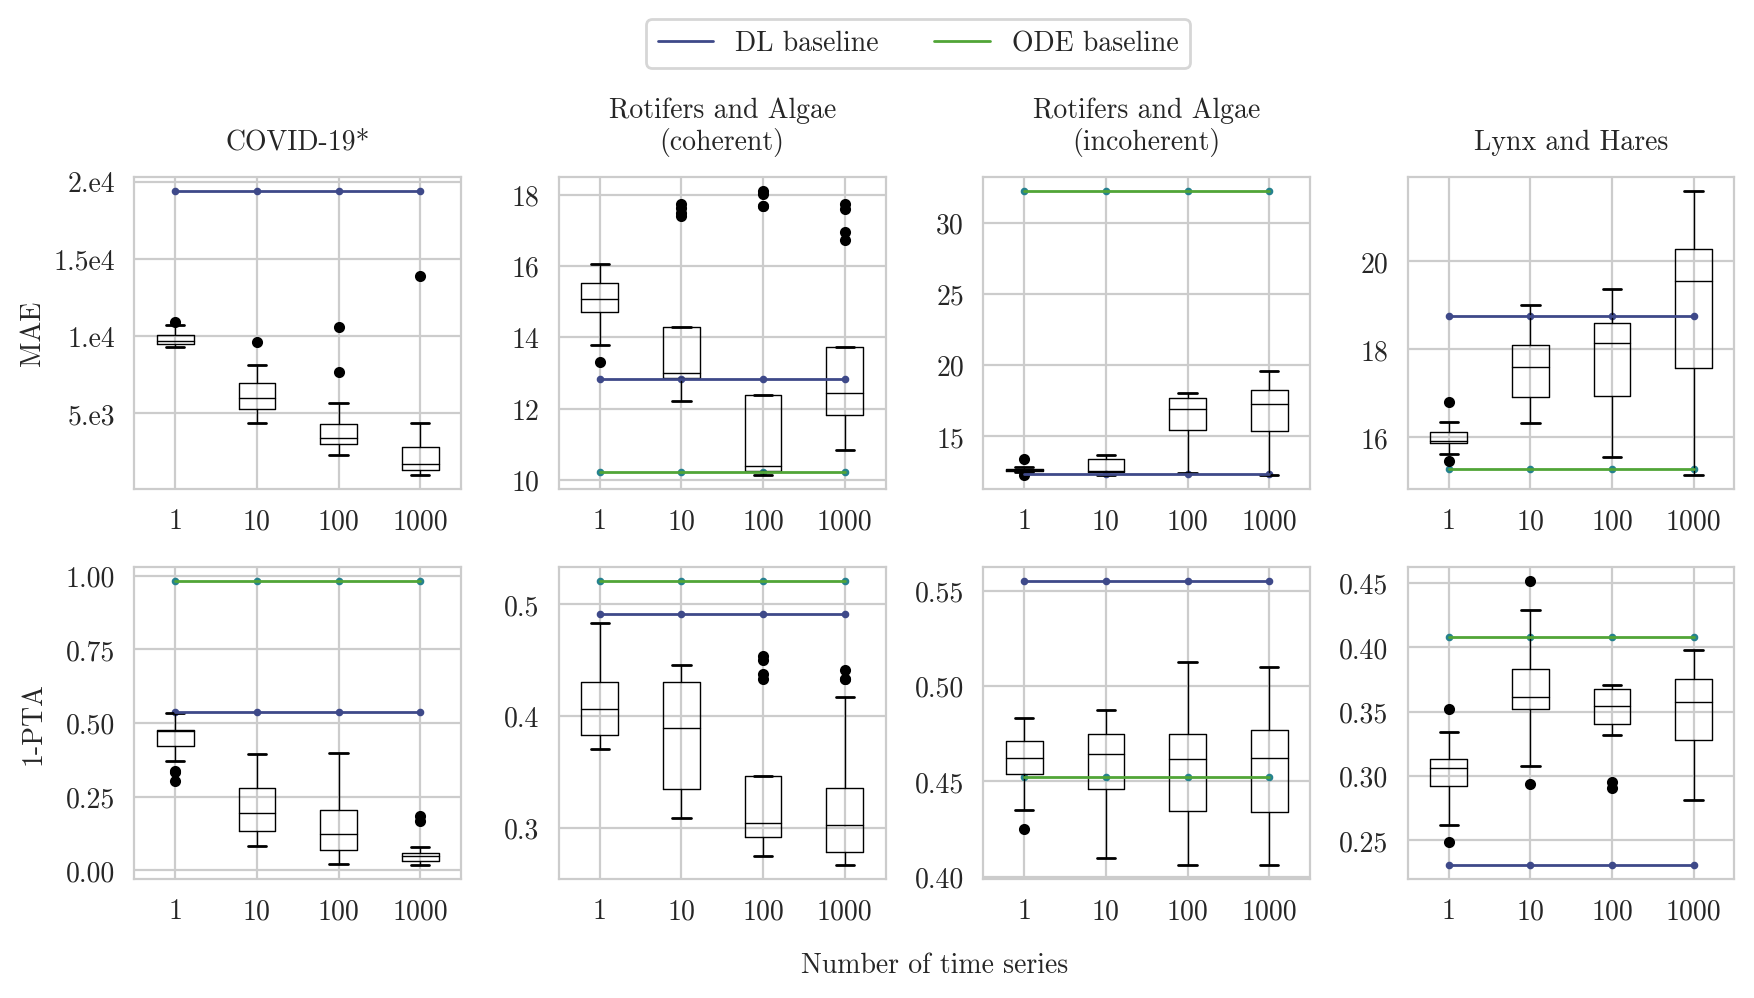

In [12]:
plot_data = {}

for exp in paths.keys():

    # create baseline dataframe for model based comparison of transfer learning runs to baseline
    baseline_comparison_data = pd.concat([transfer_learning[exp].where(transfer_learning[exp]['Models']==selected_models[exp]).dropna(how='all'),
                                        baselines[exp].where(baselines[exp]['Models']==selected_models[exp]).dropna(how='all')])
    baseline_comparison_data.sort_values(by=['TS', 'IC', 'KP'], inplace=True)
    baseline_comparison_data = baseline_comparison_data.reset_index(drop=True)
    baseline_comparison_data['Models'] = baseline_comparison_data['Models'].str.replace('_', ' ').str.replace('Custom ', '')
    baseline_comparison_data = baseline_comparison_data.rename(columns={'Transfer Learning': 'TYPE'})
    baseline_comparison_data = baseline_comparison_data.fillna(-1)
    baseline_comparison_data = baseline_comparison_data.assign(LEGEND='number of time series: ' + baseline_comparison_data['TS'].astype(int).astype(str))
    baseline_comparison_data.at[len(baseline_comparison_data)-1, 'LEGEND'] = 'basic ML run'

    # configure coloring, linestyle and alphas for plot
    colors = [COLORS[0] for _ in range(len(baseline_comparison_data))]
    colors[-1] = COLORS[0]
    linestyles = ['-' for _ in range(len(baseline_comparison_data))]
    linestyles[-1] = '--'
    alphas = [float(0.5) for _ in range(len(baseline_comparison_data))]
    alphas[-1] = 1.0
    relevant_indices = [len(baseline_comparison_data)-1]

    # get indices for each time series length and make colouring adjustments accordingly
    dataset_sizes = [1, 10, 100, 1000]
    for size_idx, size in enumerate(dataset_sizes):
        coloring_indices = baseline_comparison_data.index[baseline_comparison_data['TS'] == size]
        relevant_indices = relevant_indices + [coloring_indices[0]]
        for i in coloring_indices:
            colors[i] = COLORS[size_idx+1]

    baseline_comparison_data = baseline_comparison_data.drop(['MAE_std', '1-MDA_std', 'MASE_std'], axis=1)

    # move baseline from the list of models to own dataframe
    baseline_data = baseline_comparison_data.where(baseline_comparison_data['TS'] == -1.0).dropna(how='all')
    baseline_comparison_data = baseline_comparison_data.where(baseline_comparison_data['TS'] != -1.0).dropna()

    # make TS values integers
    baseline_comparison_data['TS'] = baseline_comparison_data['TS'].astype(int)

    plot_data[exp] = baseline_comparison_data

make_combined_boxplot(data=plot_data,
                      metrics=['MAE', '1-PTA'],
                      xlabel='Number of time series',
                      baselines=baselines,
                      ODE_baselines=ODE_baselines)

### 3. Impact of Synthetic Dataset Diversity

#### Univariate Evaluation - Initial Conditions Intervals

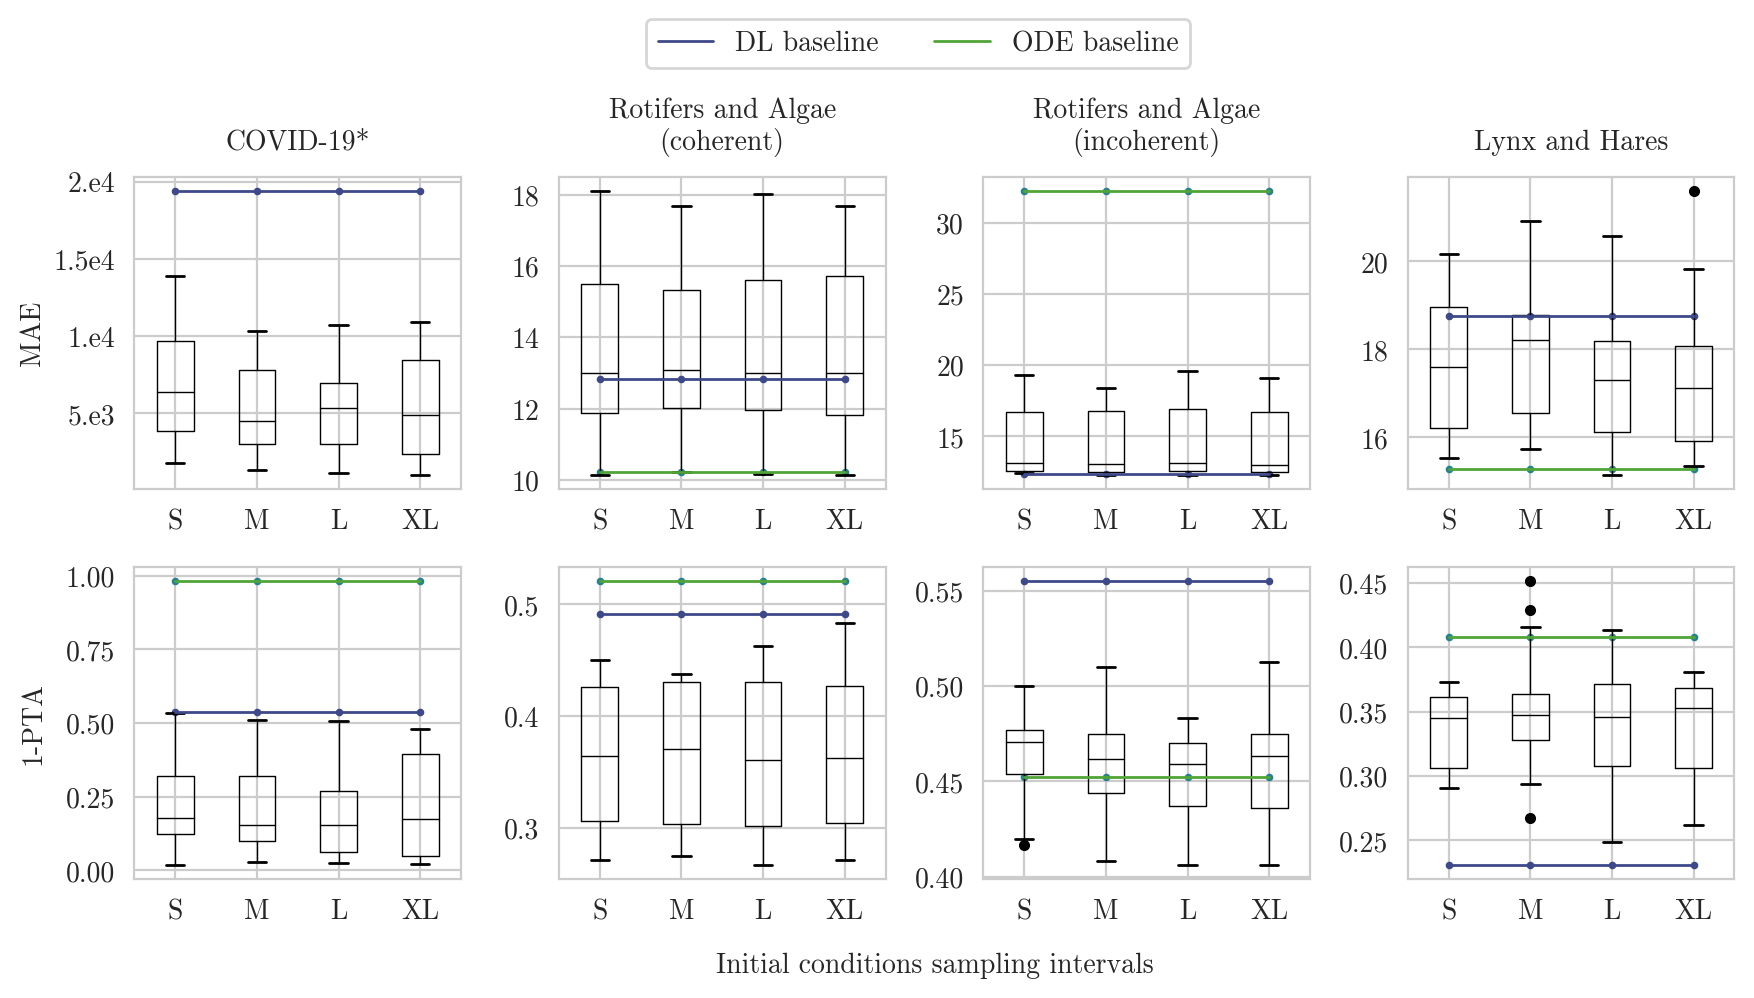

In [13]:
plot_data = {}

for exp in paths.keys():

    # create baseline dataframe for model based comparison of transfer learning runs to baseline
    baseline_comparison_data = pd.concat([transfer_learning[exp].where(transfer_learning[exp]['Models']==selected_models[exp]).dropna(how='all'),
                                        baselines[exp].where(baselines[exp]['Models']==selected_models[exp]).dropna(how='all')])
    baseline_comparison_data.sort_values(by=['TS', 'IC', 'KP'], inplace=True)
    baseline_comparison_data = baseline_comparison_data.reset_index(drop=True)
    baseline_comparison_data['Models'] = baseline_comparison_data['Models'].str.replace('_', ' ').str.replace('Custom ', '')
    baseline_comparison_data = baseline_comparison_data.rename(columns={'Transfer Learning': 'TYPE'})
    baseline_comparison_data = baseline_comparison_data.fillna(-1)
    baseline_comparison_data = baseline_comparison_data.assign(LEGEND='number of time series: ' + baseline_comparison_data['IC'].astype(int).astype(str))
    baseline_comparison_data.at[len(baseline_comparison_data)-1, 'LEGEND'] = 'basic ML run'

    # configure coloring, linestyle and alphas for plot
    colors = [COLORS[0] for _ in range(len(baseline_comparison_data))]
    colors[-1] = COLORS[0]
    linestyles = ['-' for _ in range(len(baseline_comparison_data))]
    linestyles[-1] = '--'
    alphas = [float(0.5) for _ in range(len(baseline_comparison_data))]
    alphas[-1] = 1.0
    relevant_indices = [len(baseline_comparison_data)-1]

    # get indices for each time series length and make colouring adjustments accordingly
    sampling_intervals_size = [0, 1, 2, 3]
    for size_idx, size in enumerate(sampling_intervals_size):
        coloring_indices = baseline_comparison_data.index[baseline_comparison_data['IC'] == size]
        relevant_indices = relevant_indices + [coloring_indices[0]]
        for i in coloring_indices:
            colors[i] = COLORS[size_idx+1]

    baseline_comparison_data = baseline_comparison_data.drop(['MAE_std', '1-MDA_std', 'MASE_std'], axis=1)

    # move baseline from the list of models to own dataframe
    baseline_data = baseline_comparison_data.where(baseline_comparison_data['IC'] == -1.0).dropna(how='all')
    baseline_comparison_data = baseline_comparison_data.where(baseline_comparison_data['IC'] != -1.0).dropna()

    # make TS values integers
    baseline_comparison_data['IC'] = baseline_comparison_data['IC'].astype(int)

    plot_data[exp] = baseline_comparison_data

make_combined_boxplot(data=plot_data,
                      metrics=['MAE', '1-PTA'],
                      xlabel='Initial conditions sampling intervals',
                      baselines=baselines,
                      category='IC',
                      ODE_baselines=ODE_baselines)

#### Univariate Evaluation - Kinetic Parameter Intervals

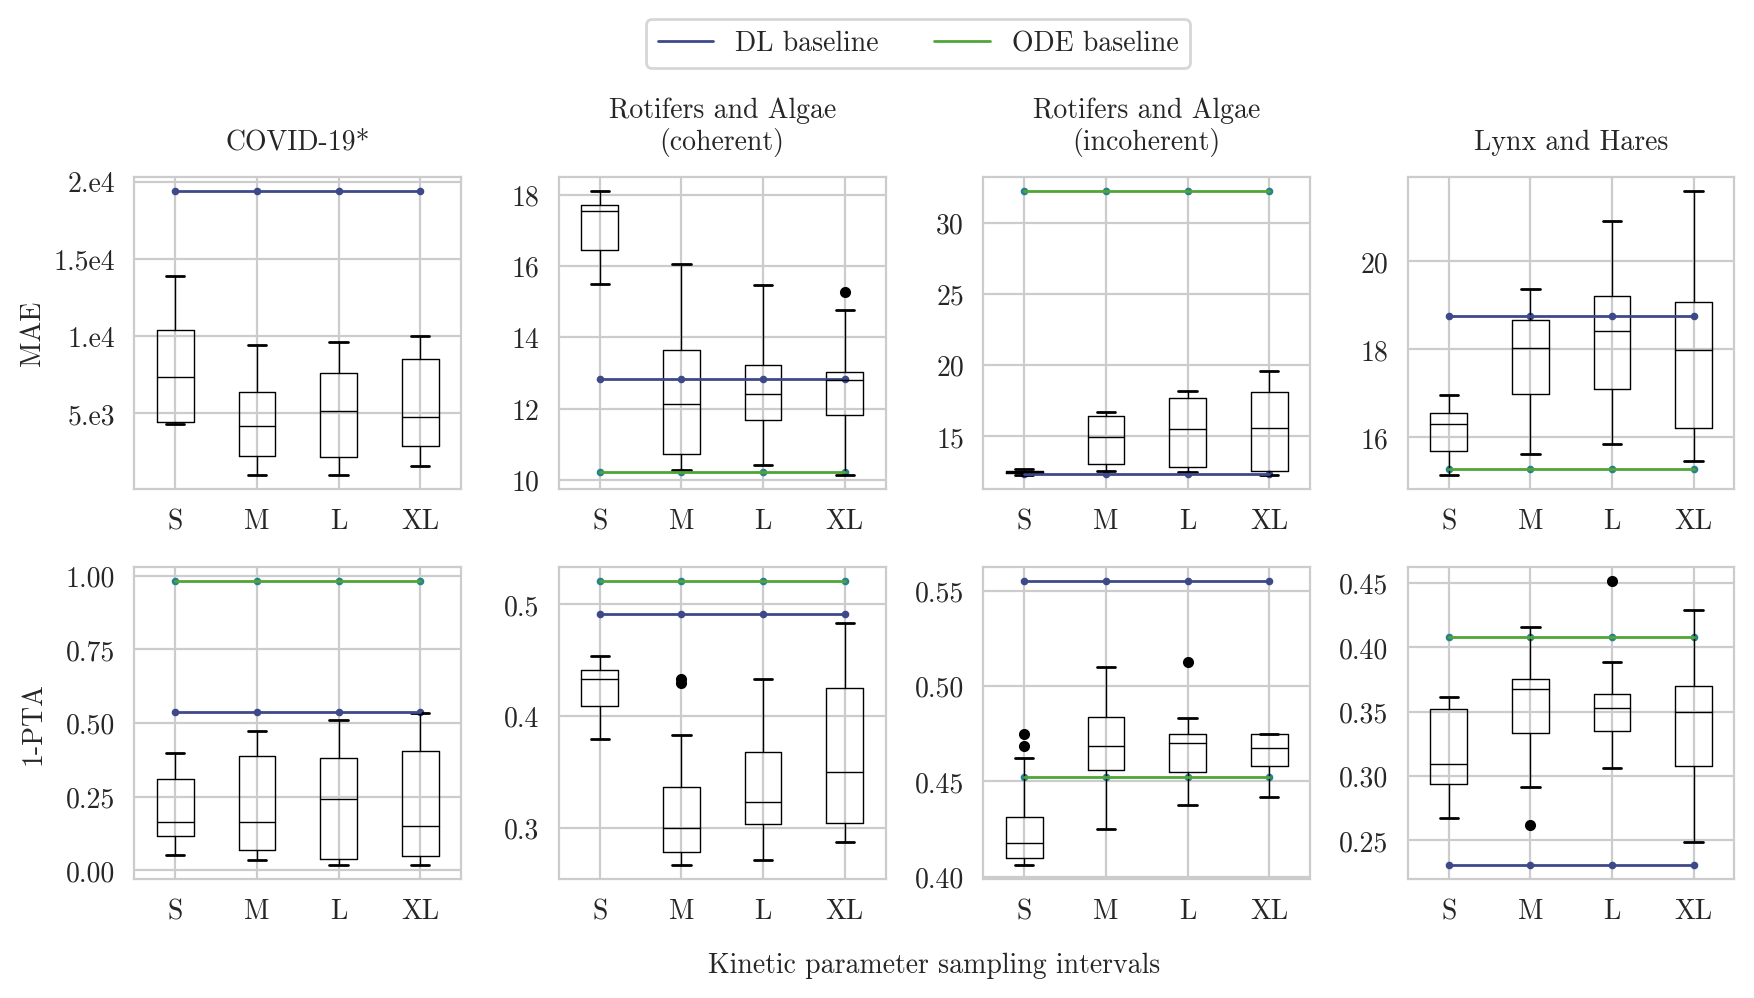

In [14]:
plot_data = {}

for exp in paths.keys():

    # create baseline dataframe for model based comparison of transfer learning runs to baseline
    baseline_comparison_data = pd.concat([transfer_learning[exp].where(transfer_learning[exp]['Models']==selected_models[exp]).dropna(how='all'),
                                        baselines[exp].where(baselines[exp]['Models']==selected_models[exp]).dropna(how='all')])
    baseline_comparison_data.sort_values(by=['TS', 'IC', 'KP'], inplace=True)
    baseline_comparison_data = baseline_comparison_data.reset_index(drop=True)
    baseline_comparison_data['Models'] = baseline_comparison_data['Models'].str.replace('_', ' ').str.replace('Custom ', '')
    baseline_comparison_data = baseline_comparison_data.rename(columns={'Transfer Learning': 'TYPE'})
    baseline_comparison_data = baseline_comparison_data.fillna(-1)
    baseline_comparison_data = baseline_comparison_data.assign(LEGEND='number of time series: ' + baseline_comparison_data['KP'].astype(int).astype(str))
    baseline_comparison_data.at[len(baseline_comparison_data)-1, 'LEGEND'] = 'basic ML run'

    # configure coloring, linestyle and alphas for plot
    colors = [COLORS[0] for _ in range(len(baseline_comparison_data))]
    colors[-1] = COLORS[0]
    linestyles = ['-' for _ in range(len(baseline_comparison_data))]
    linestyles[-1] = '--'
    alphas = [float(0.5) for _ in range(len(baseline_comparison_data))]
    alphas[-1] = 1.0
    relevant_indices = [len(baseline_comparison_data)-1]

    # get indices for each time series length and make colouring adjustments accordingly
    sampling_intervals_size = [0, 1, 2, 3]
    for size_idx, size in enumerate(sampling_intervals_size):
        coloring_indices = baseline_comparison_data.index[baseline_comparison_data['KP'] == size]
        relevant_indices = relevant_indices + [coloring_indices[0]]
        for i in coloring_indices:
            colors[i] = COLORS[size_idx+1]

    baseline_comparison_data = baseline_comparison_data.drop(['MAE_std', '1-MDA_std', 'MASE_std'], axis=1)

    # move baseline from the list of models to own dataframe
    baseline_data = baseline_comparison_data.where(baseline_comparison_data['KP'] == -1.0).dropna(how='all')
    baseline_comparison_data = baseline_comparison_data.where(baseline_comparison_data['KP'] != -1.0).dropna()

    # make TS values integers
    baseline_comparison_data['KP'] = baseline_comparison_data['KP'].astype(int)

    plot_data[exp] = baseline_comparison_data

make_combined_boxplot(data=plot_data,
                        metrics=['MAE', '1-PTA'],
                        xlabel='Kinetic parameter sampling intervals',
                        baselines=baselines,
                        ODE_baselines=ODE_baselines,
                        category='KP')